

# Обзор анализа MEG/EEG с помощью MNE-Python

Импорт необходимых модулей Python:

In [ ]:
import numpy as np
import os
import mne

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize

## Загрузка данных
<br>
->Этот код: 
спользует функцию mne.datasets.sample.data_path() для загрузки датасета. <br>
Определяет путь к файлу sample_audvis_raw.fif, содержащему сырые данные. <br>
Загружает сырые данные с помощью mne.io.read_raw_fif().



In [13]:
# Загрузка пути к датасету
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')

# Загрузка сырых данных
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
print("Сырые данные успешно загружены.")
print(raw.info)

Using default location ~/mne_data for sample...
Creating C:\Users\chapa\mne_data


100%|#####################################| 1.65G/1.65G [00:00<00:00, 1.70TB/s]
Untarring contents of 'C:\Users\chapa\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\chapa\mne_data'


Attempting to create new mne-python configuration file:
C:\Users\chapa\.mne\mne-python.json
Download complete in 08m17s (1576.2 MB)
Opening raw data file C:\Users\chapa\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Сырые данные успешно загружены.
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 ev

In [14]:
# Информация о данных
print(raw)
print(raw.info)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


## Анализ данных

<h3>Объяснение кода</h3> 
->Загрузка данных: <br>
Датасет sample загружается с помощью mne.datasets.sample.data_path(). <br>
Файл sample_audvis_raw.fif содержит сырые данные. <br>
->Предобработка: <br>
Визуализируется спектральная плотность мощности (PSD). <br>
Применяется метод независимых компонент (ICA) для удаления артефактов. <br>
->Эпохи: <br>
Эпохи создаются на основе событий. <br>
Уравнивается количество событий для разных условий. <br>
->Анализ: <br>
Выполняется временная частотная декомпозиция (TFR). <br>
Сравниваются усредненные данные для слуховых и зрительных стимулов. <br>
->Локализация источников: <br>
Используется обратный оператор для локализации источников активности мозга.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


c:\Users\chapa\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


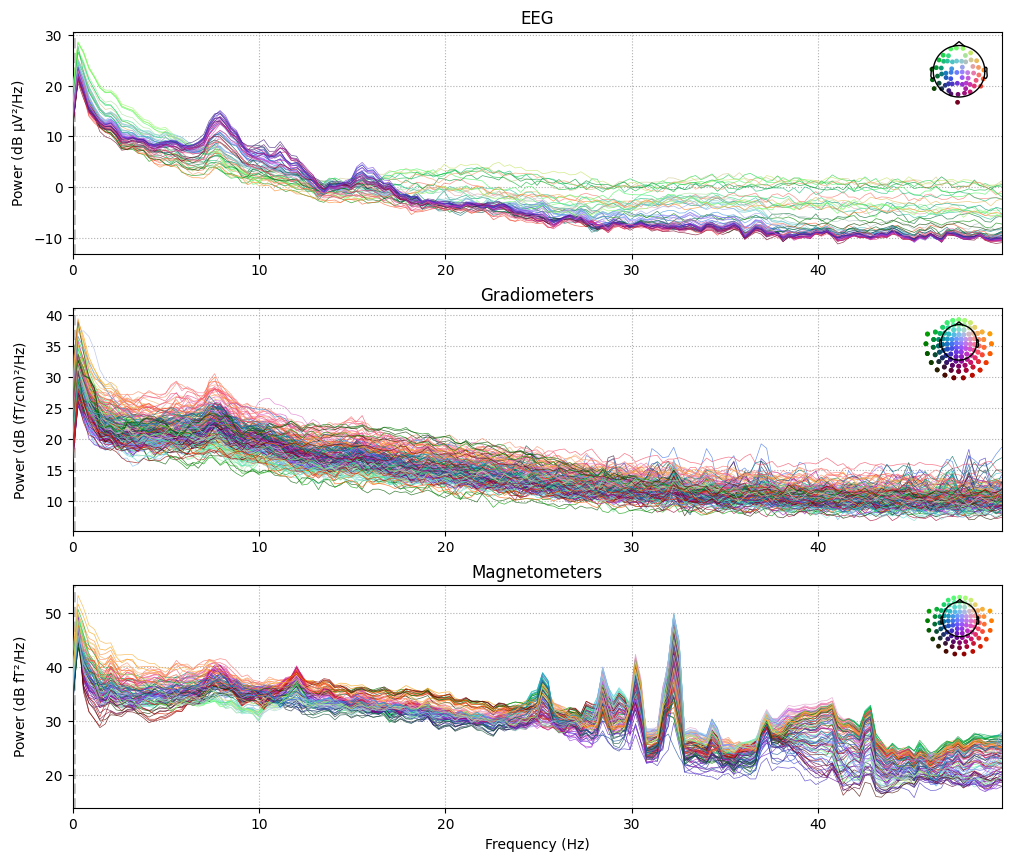

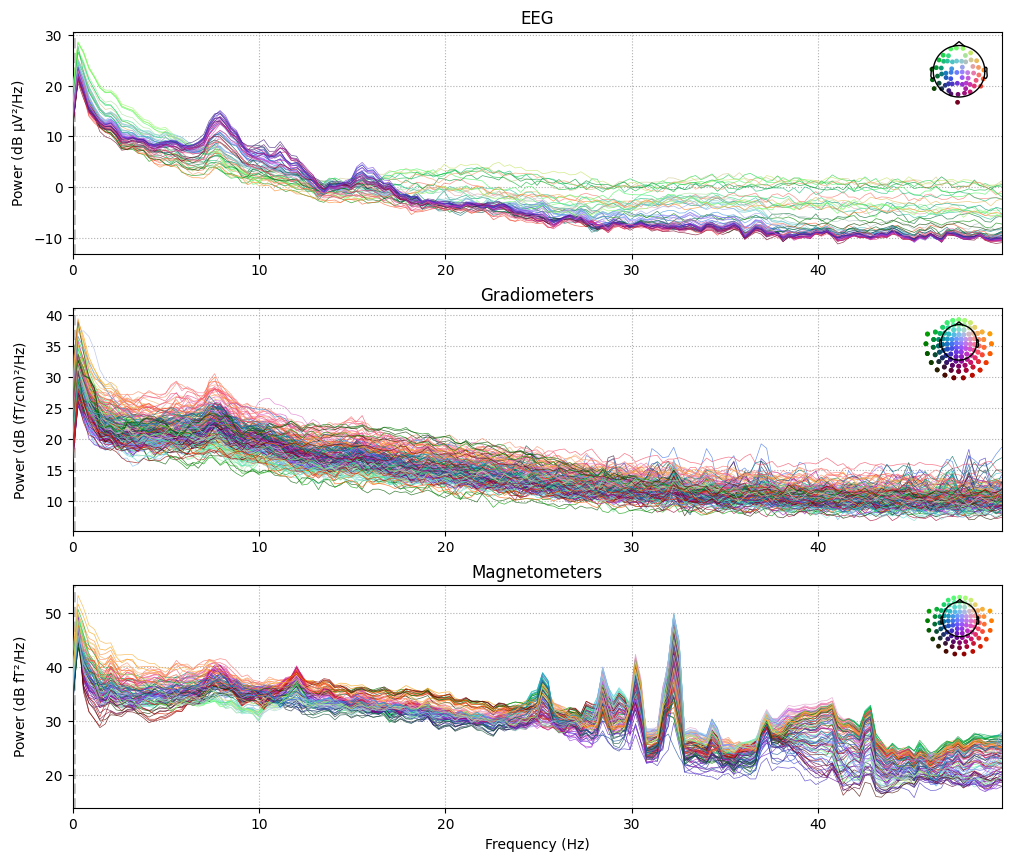

In [15]:
# Визуализация спектральной плотности мощности (PSD)
raw.plot_psd(fmax=50)

Using matplotlib as 2D backend.


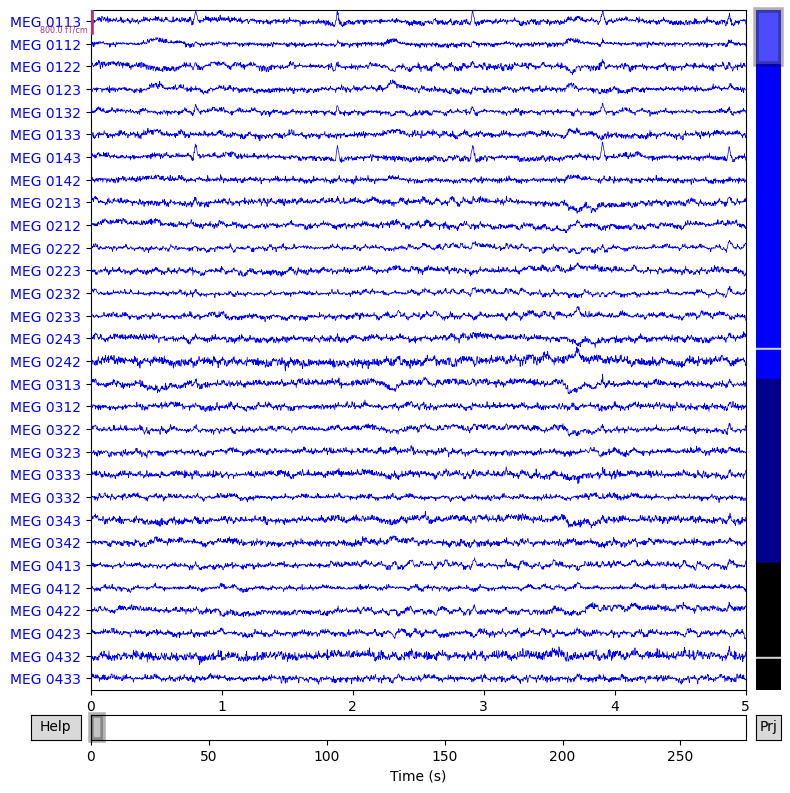

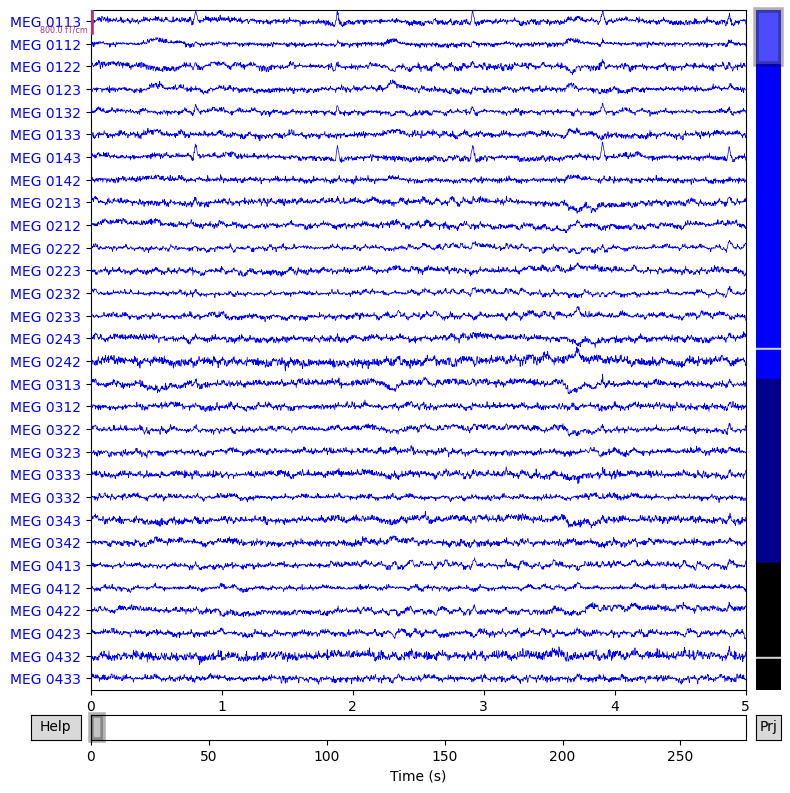

In [16]:
# Визуализация сырых данных
raw.plot(duration=5, n_channels=30)

In [17]:
# Размерность данных
print(raw.get_data().shape)
print(type(raw.get_data()))

(376, 166800)
<class 'numpy.ndarray'>


<b>ICA (Independent Component Analysis)</b> — это метод слепого разделения сигналов, который используется для разложения смеси сигналов на независимые компоненты. В контексте анализа данных MEG/EEG, ICA помогает выделить отдельные источники активности мозга или артефакты (например, движения глаз, моргания, мышечные артефакты) из сырых данных. <br>

Основная идея заключается в том, что данные записываются как линейная комбинация независимых источников, и ICA пытается восстановить эти источники, предполагая их статистическую независимость. <br>

Зачем использовать ICA в анализе MEG/EEG? <br>
Удаление артефактов:<br>
Артефакты (например, движения глаз, моргания, сердцебиения) могут значительно влиять на качество данных. <br>
ICA позволяет отделить эти артефакты от полезных сигналов мозга. <br>
Выделение независимых источников: <br>
ICA может помочь выделить независимые источники активности мозга, которые могут быть связаны с определенными когнитивными процессами. <br>
Предобработка данных: <br>
После удаления артефактов данные становятся более чистыми, что улучшает качество последующего анализа (например, эпохи, усредненные данные, временная частотная декомпозиция). <br>
Как работает ICA? <br>
ICA решает задачу "разделения смеси сигналов". Предположим, что ваши данные представляют собой смесь нескольких независимых сигналов (например, активность мозга + артефакты). <br>Математически это можно записать как: <br>
<br>
X=A⋅S <br>
где: <br>

X — наблюдаемые данные (например, сигналы от электродов). <br>
A — матрица смешивания (неизвестна). <br>
S — независимые источники (неизвестны). <br>
Задача ICA — найти обратную матрицу W (унмикширование), чтобы восстановить исходные источники: <br>
<br>
S_estimated = W⋅X <br>
<br>
ICA использует статистические методы (например, минимизацию взаимной информации между компонентами), чтобы отделить независимые источники.

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 15.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


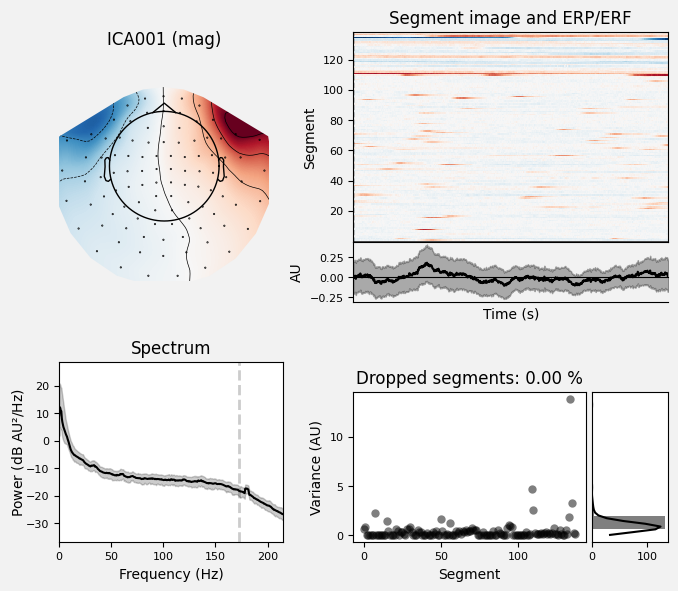

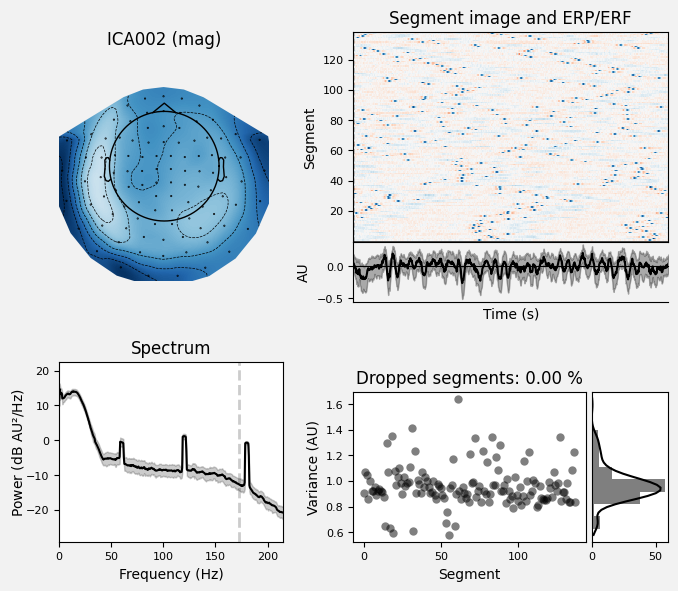

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [18]:
# Настройка и обучение ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # Исключение компонентов (подробности опущены)
ica.plot_properties(raw, picks=ica.exclude)

In [19]:
# Применение ICA
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>

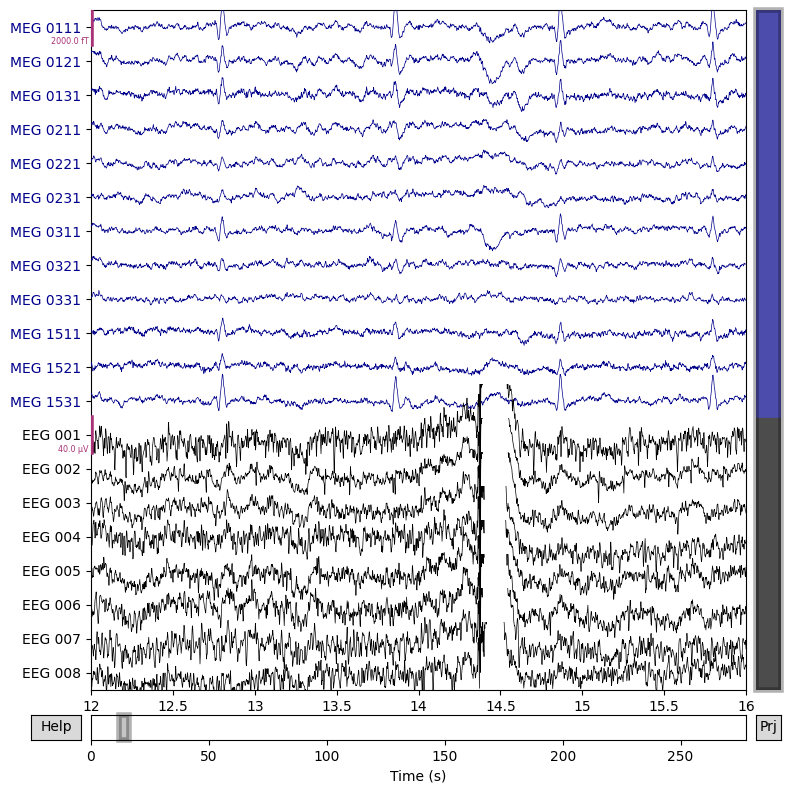

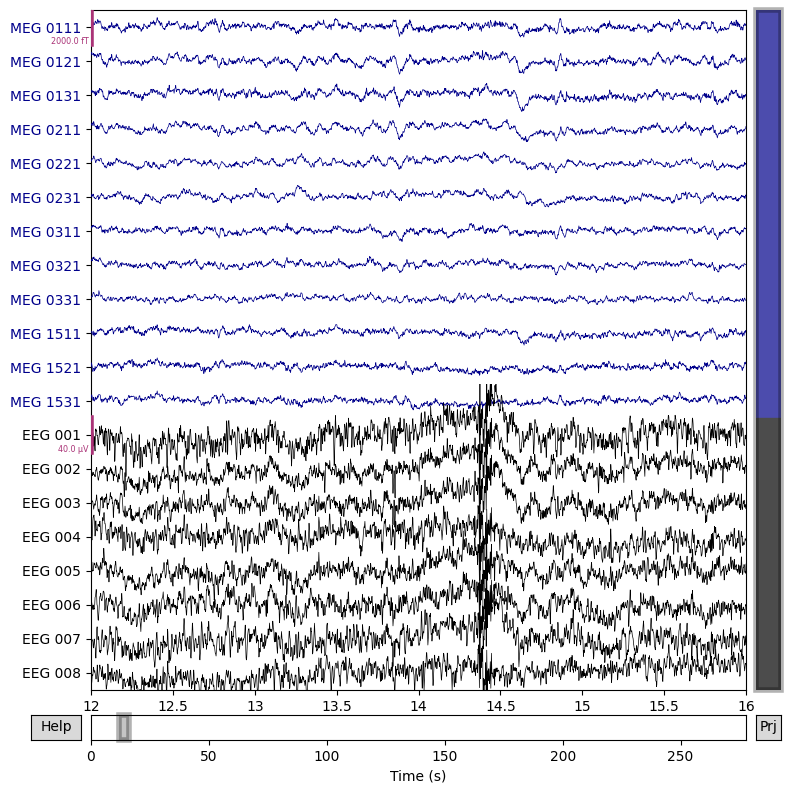

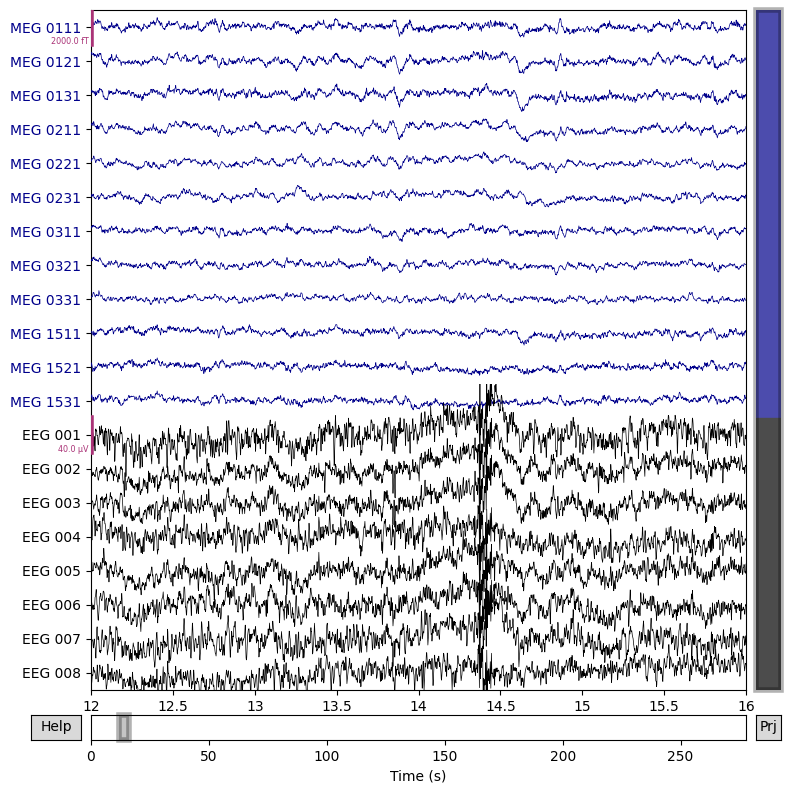

In [20]:
# Визуализация каналов до и после применения ICA
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


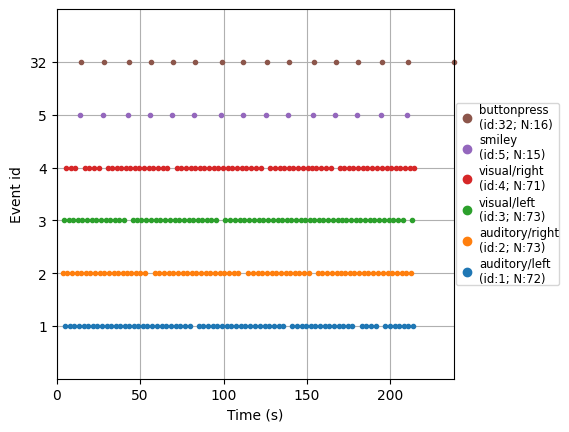

In [21]:
# Поиск событий
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # Первые 5 событий

# Словарь событий
event_dict = {
    'auditory/left': 1, 'auditory/right': 2,
    'visual/left': 3, 'visual/right': 4,
    'smiley': 5, 'buttonpress': 32
}

# Визуализация событий
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 004', 'EEG 005', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 015', 'EEG 019', 'EEG 022', 'EEG 027']
    Rejecting  epoch based on EEG : ['EEG 004', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 015', 'EEG 016', 'EEG 018', 'EEG 019', 'EEG 022', 'EEG 036']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based 

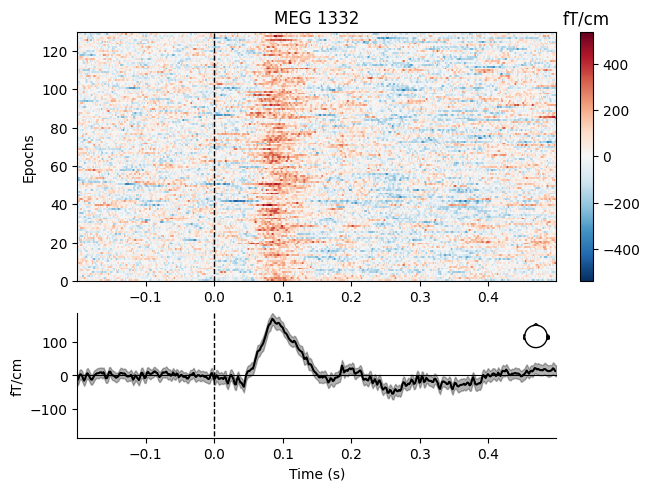

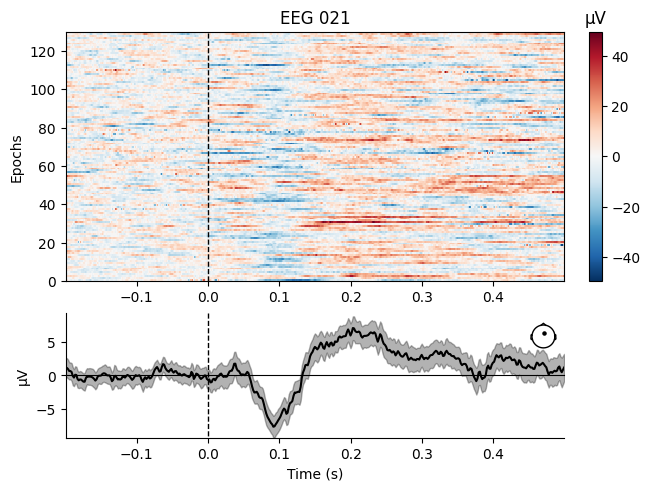

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [22]:
# Отклонение плохих эпох
reject_criteria = dict(
    mag=4000e-15,     # 4000 fT
    grad=4000e-13,    # 4000 fT/cm
    eeg=150e-6,       # 150 µV
    eog=250e-6        # 250 µV
)
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

print(epochs.get_data().shape)
print(type(epochs.get_data()))

# Уравнивание количества событий
conds_we_care_about = ['auditory/left', 'auditory/right', 'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)

# Разделение на слуховые и зрительные эпохи
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

# Освобождение памяти
del raw, epochs

# Визуализация эпох
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    8.9s


No baseline correction applied


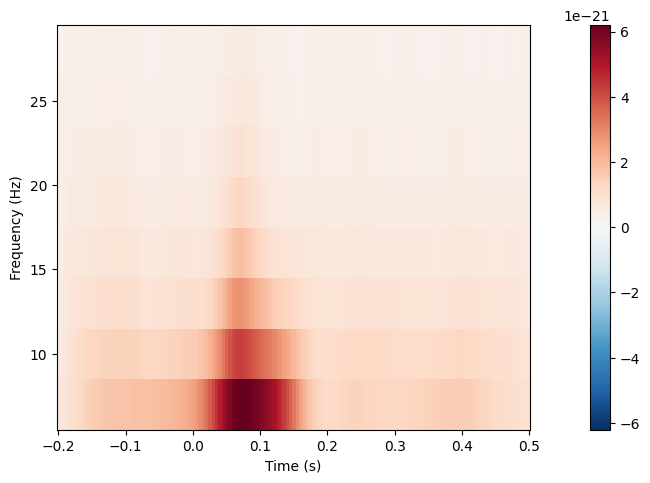

Multiple channel types selected, returning one figure per type.
combining channels using RMS (grad channels)
combining channels using RMS (grad channels)


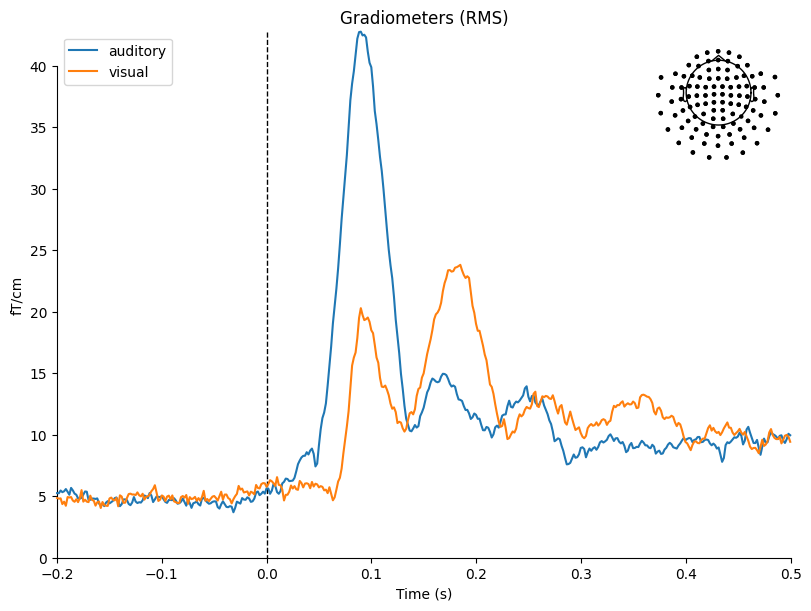

combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


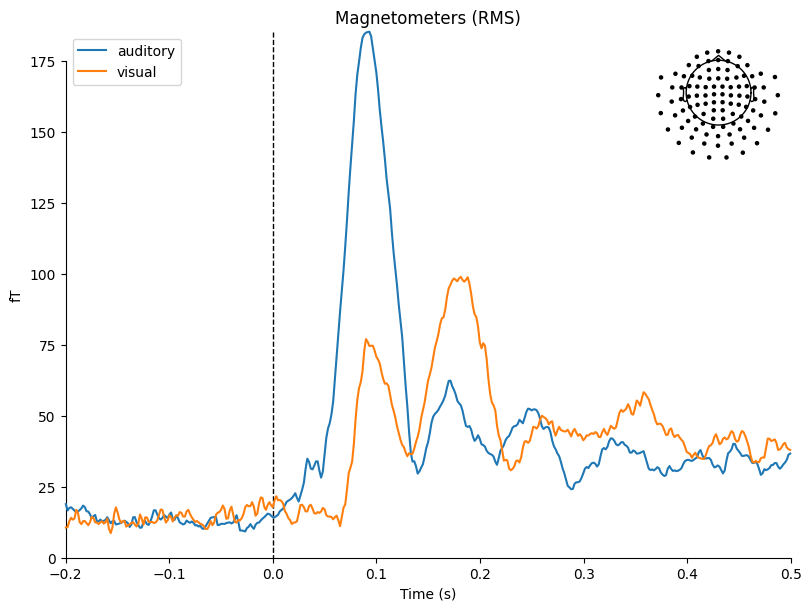

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


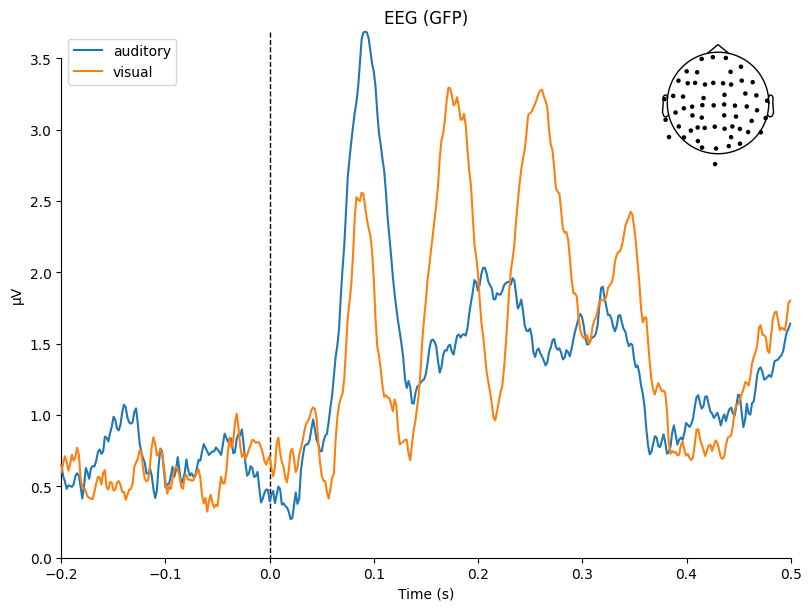

[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]

In [23]:
# Временная частотная декомпозиция (TFR)
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1332'])

# Усредненные данные
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

# Сравнение усредненных данных
mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

In [24]:
print(aud_evoked.data.shape)
print(type(aud_evoked.data))

(366, 421)
<class 'numpy.ndarray'>


Projections have already been applied. Setting proj attribute to True.


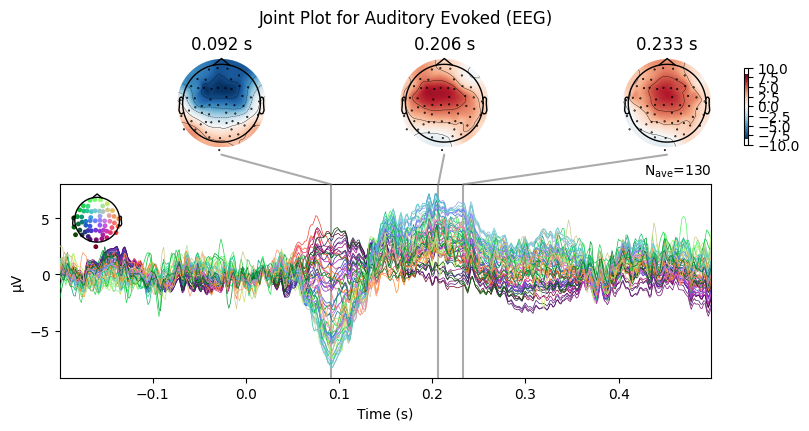

<Figure size 1000x600 with 0 Axes>

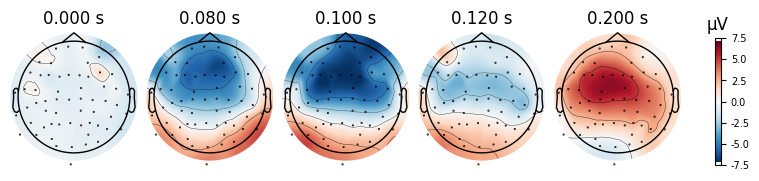

<Figure size 640x480 with 0 Axes>

Difference between auditory and visual evoked responses computed.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


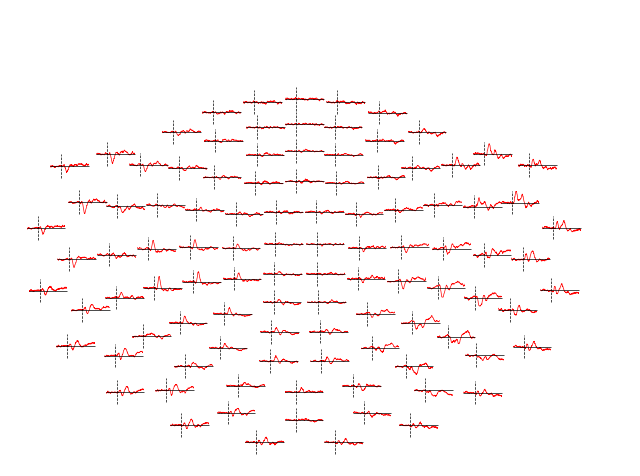

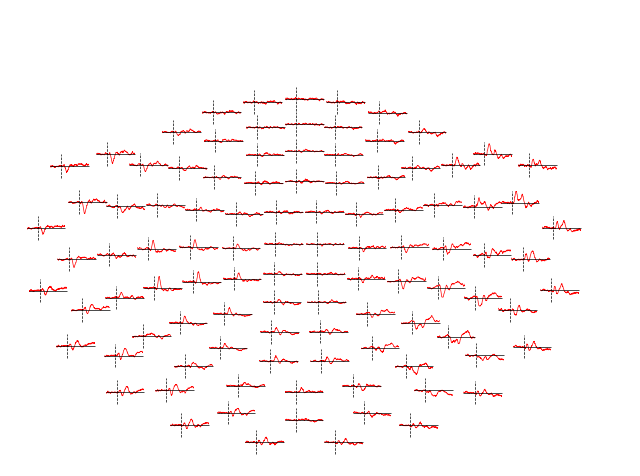

In [29]:
import matplotlib.pyplot as plt

# Совместная визуализация
aud_evoked.plot_joint(picks='eeg', title="Joint Plot for Auditory Evoked (EEG)")

# Визуализация топографии
plt.figure(figsize=(10, 6))  # Создаем новую фигуру
aud_evoked.plot_topomap(
    times=[0., 0.08, 0.1, 0.12, 0.2], 
    ch_type='eeg'
)
plt.suptitle("Topomap for Auditory Evoked (EEG)", fontsize=16)  # Добавляем заголовок
plt.show()

# Разница между условиями
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
print("Difference between auditory and visual evoked responses computed.")

# Визуализация разницы с использованием MEG-магнитометров
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

# Задание 

Используя данные для частоты бета для правой и левой руки построить топографические карты (усредненные между испытуемыми) в интервале -800 + 1600 мс, с шагом усреднения 200 мс. Необходимо получить 3 ряда топомапов - для правой руки, для левой руки и для разницы между ними (правая минус левая). 

Посказка:  

- для построения топомапов используется функция plot_topomap;  
- для загрузки данных используется функция mne.Evoked();  
- испытуеме с L001 по L028, за исключением L015;
- чтобы построить топографические карты, мы можем присвоить их уже существующему объекту Evoked.  
для этого мы должны открыть имеющийся файл с помощью функции new = mne.Evoked('...')  
new.data = our_data

тогда дальше мы можем стрить топомапы с помощью функции plot_topomap как показано выше  

new.plot_topomap()

## Загрузка данных для всех испытуемых <br>
Мы будем загружать данные для каждого испытуемого, исключая L015. Предполагается, что файлы данных находятся в формате .fif и содержат усредненные данные (Evoked).

In [34]:
# Пути к папкам с данными
right_data_folder = r'C:\Python\PsyTomograpgy\beta_right_hand'
left_data_folder = r'C:\Python\PsyTomograpgy\beta_left_hand'

# Список испытуемых (исключаем L015)
subjects = [f"L{str(i).zfill(3)}" for i in range(1, 29) if i != 15]

# Словарь для хранения данных
evoked_data = {"left": [], "right": []}

# Загрузка данных
valid_subjects = []
for subject in subjects:
    # Пути к файлам для правой и левой руки
    left_file = os.path.join(left_data_folder, f"{subject}_comb_planar_left_hand_self_paced.fif")
    right_file = os.path.join(right_data_folder, f"{subject}_comb_planar_right_hand_self_paced.fif")
    
    # Проверка существования файлов
    if not os.path.exists(left_file):
        print(f"Файл для левой руки не найден: {left_file}")
        continue
    if not os.path.exists(right_file):
        print(f"Файл для правой руки не найден: {right_file}")
        continue
    
    # Загрузка данных для левой и правой руки
    evoked_left = mne.read_evokeds(left_file)[0]
    evoked_right = mne.read_evokeds(right_file)[0]
    
    # Добавление данных в словарь
    evoked_data["left"].append(evoked_left)
    evoked_data["right"].append(evoked_right)
    valid_subjects.append(subject)

print(f"Загружено {len(valid_subjects)} испытуемых: {valid_subjects}")

Reading C:\Python\PsyTomograpgy\beta_left_hand\L001_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L001_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L002_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 -

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L001_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L001_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L002_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L004_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L004_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.a

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L004_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L004_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L005_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L007_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L007_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.a

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L007_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L007_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L008_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L010_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L010_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction 

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L010_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L010_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L011_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L013_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L013_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.a

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L013_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L013_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L014_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L017_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L017_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.a

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L017_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L017_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L018_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L020_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L020_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction 

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L020_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L020_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L021_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L023_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L023_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction 

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L023_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L023_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L024_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_left_hand\L026_comb_planar_left_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading C:\Python\PsyTomograpgy\beta_right_hand\L026_comb_planar_right_hand_self_paced.fif ...
    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction 

C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L026_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_left = mne.read_evokeds(left_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:28: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_right_hand\L026_comb_planar_right_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_right = mne.read_evokeds(right_file)[0]
C:\Users\chapa\AppData\Local\Temp\ipykernel_424\1947196849.py:27: RuntimeWarning: This filename (C:\Python\PsyTomograpgy\beta_left_hand\L027_comb_planar_left_hand_self_paced.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.

    Found the data of interest:
        t =   -1300.00 ...    1696.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 11 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Загружено 27 испытуемых: ['L001', 'L002', 'L003', 'L004', 'L005', 'L006', 'L007', 'L008', 'L009', 'L010', 'L011', 'L012', 'L013', 'L014', 'L016', 'L017', 'L018', 'L019', 'L020', 'L021', 'L022', 'L023', 'L024', 'L025', 'L026', 'L027', 'L028']


## Усреднение данных по времени <br>
Теперь усредним данные для каждого временного интервала (-800 мс ... +1600 мс) с шагом 200 мс.

In [36]:
# Интервалы времени
time_intervals = [
    (-0.8, -0.6), (-0.6, -0.4), (-0.4, -0.2), (-0.2, 0.0),
    (0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0),
    (1.0, 1.2), (1.2, 1.4), (1.4, 1.6)
]

# Функция для усреднения данных в заданном временном интервале
def average_data_in_interval(evoked_list, tmin, tmax):
    times = evoked_list[0].times
    averaged_data = []
    for evoked in evoked_list:
        # Выбираем данные в заданном временном интервале
        mask = (times >= tmin) & (times <= tmax)
        data = evoked.data[:, mask]
        # Усредняем по времени
        averaged_data.append(np.mean(data, axis=1))
    return np.mean(averaged_data, axis=0)  # Усредняем по всем испытуемым

# Создание объектов Evoked для усредненных данных
info = evoked_data["left"][0].info  # Информация о каналах и т.д.

evoked_averaged = {
    "left": [],
    "right": [],
    "difference": []
}

for tmin, tmax in time_intervals:
    # Усреднение для левой руки
    left_avg = average_data_in_interval(evoked_data["left"], tmin, tmax)
    evoked_left = mne.EvokedArray(left_avg[:, np.newaxis], info, tmin=tmin)
    evoked_averaged["left"].append(evoked_left)
    
    # Усреднение для правой руки
    right_avg = average_data_in_interval(evoked_data["right"], tmin, tmax)
    evoked_right = mne.EvokedArray(right_avg[:, np.newaxis], info, tmin=tmin)
    evoked_averaged["right"].append(evoked_right)
    
    # Разница между правой и левой рукой
    diff_avg = right_avg - left_avg
    evoked_diff = mne.EvokedArray(diff_avg[:, np.newaxis], info, tmin=tmin)
    evoked_averaged["difference"].append(evoked_diff)

## # Проверка типов каналов в данных

In [38]:
# Проверка типов каналов в данных
print("Типы каналов в данных:")
print(evoked_data["left"][0].get_channel_types(unique=True))

Типы каналов в данных:
['grad']


## Проверка наличия пар градиометров

In [39]:
# Проверка наличия пар градиометров
info = evoked_data["left"][0].info
picks_grad = mne.pick_types(info, meg='grad', eeg=False)
print(f"Количество градиометров: {len(picks_grad)}")

# Проверка пар градиометров
try:
    pairs = mne.channels.layout._pair_grad_sensors(info)
    print(f"Количество пар градиометров: {len(pairs)}")
except ValueError as e:
    print(f"Ошибка при проверке пар градиометров: {e}")

Количество градиометров: 102
Ошибка при проверке пар градиометров: No 'grad' channel pairs found.


## Построение топографических карт
Теперь строим топомапы для каждого временного интервала.

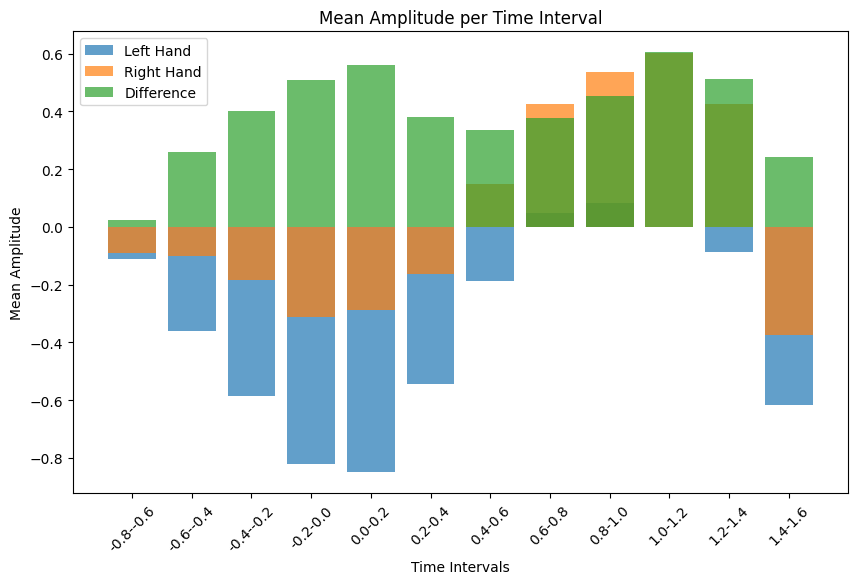

In [55]:
# Гистограмма средних значений
mean_left = [np.mean(evoked.data.mean(axis=0)) for evoked in evoked_averaged["left"]]
mean_right = [np.mean(evoked.data.mean(axis=0)) for evoked in evoked_averaged["right"]]
mean_diff = [np.mean(evoked.data.mean(axis=0)) for evoked in evoked_averaged["difference"]]

plt.figure(figsize=(10, 6))
plt.bar(range(len(time_intervals)), mean_left, label="Left Hand", alpha=0.7)
plt.bar(range(len(time_intervals)), mean_right, label="Right Hand", alpha=0.7)
plt.bar(range(len(time_intervals)), mean_diff, label="Difference", alpha=0.7)
plt.xticks(range(len(time_intervals)), [f"{tmin}-{tmax}" for tmin, tmax in time_intervals], rotation=45)
plt.title("Mean Amplitude per Time Interval")
plt.xlabel("Time Intervals")
plt.ylabel("Mean Amplitude")
plt.legend()
plt.show()

Используем градиометры без пар.
Используемый тип каналов: grad


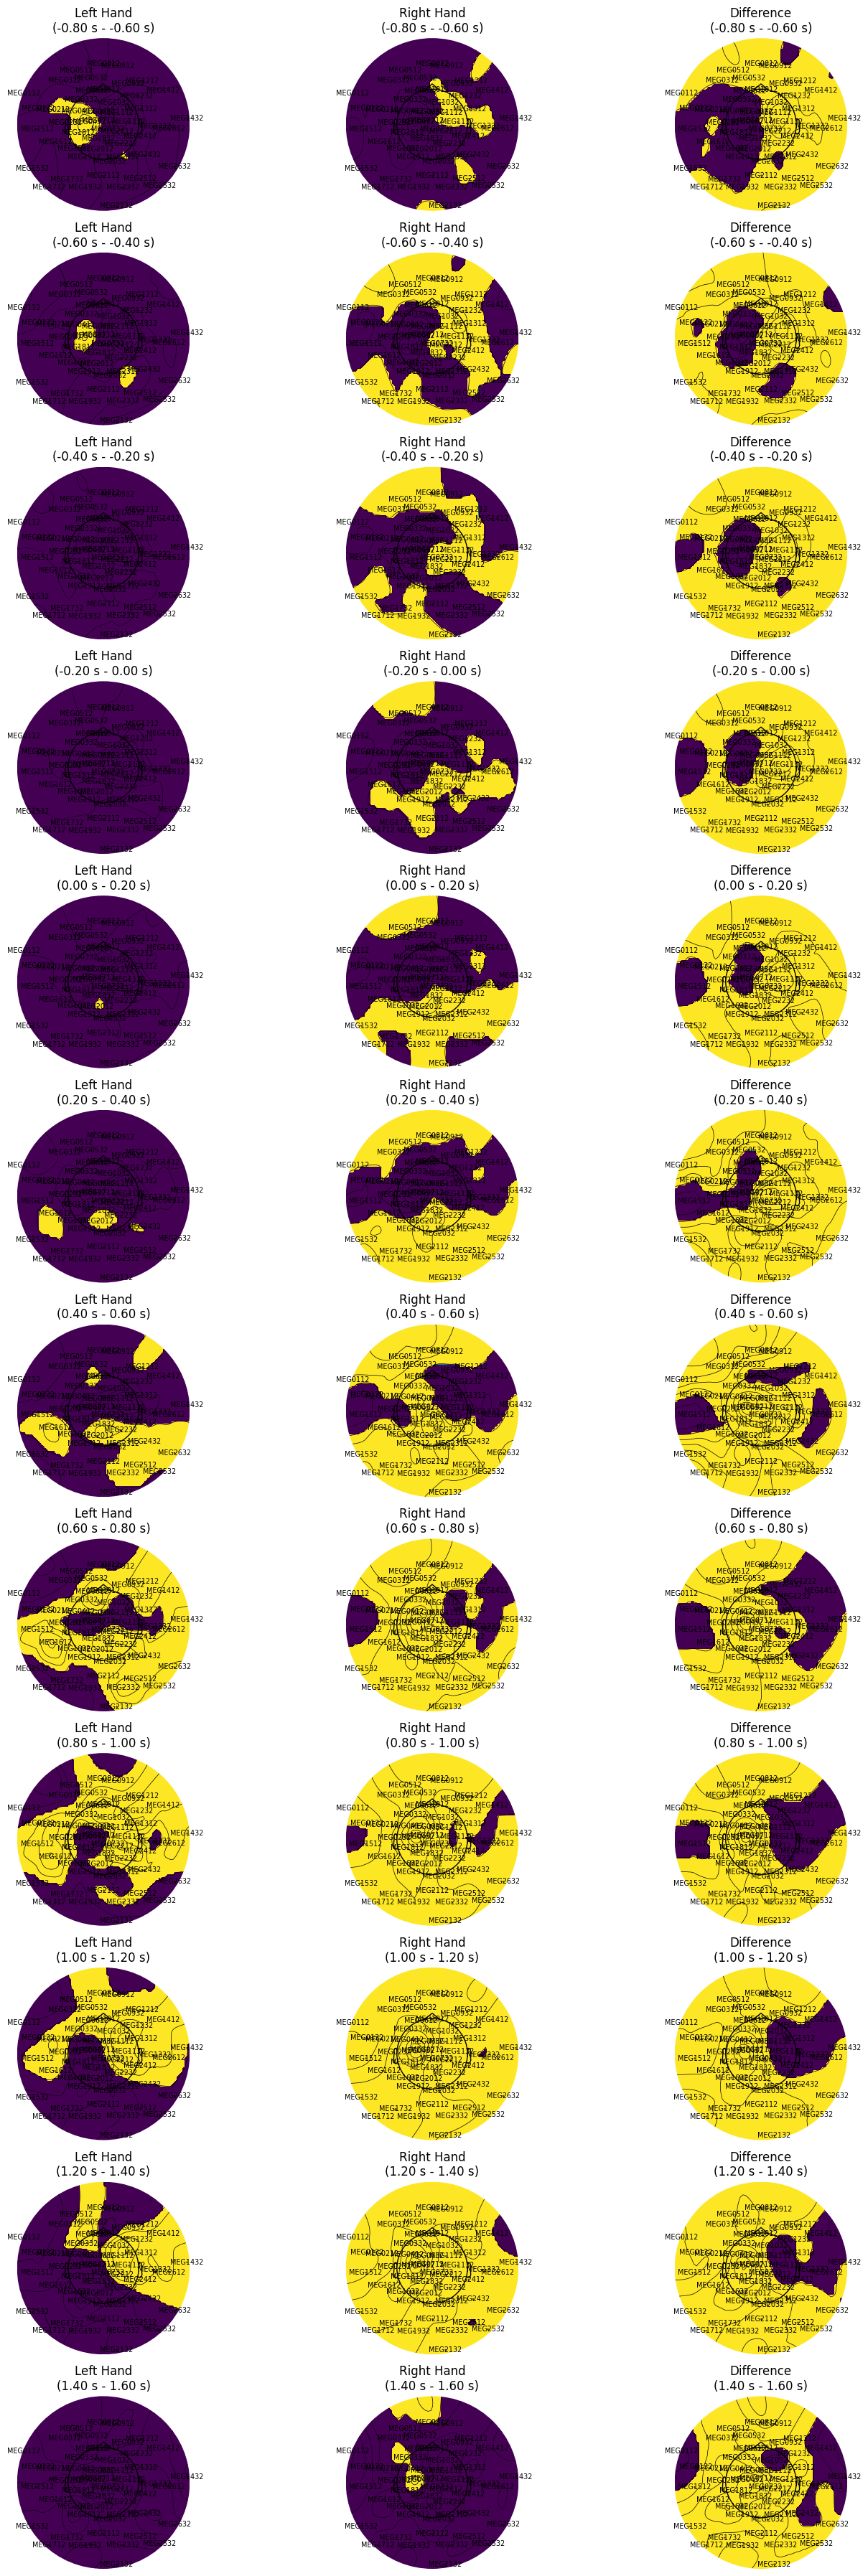

In [67]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize

# Определяем временные интервалы
time_intervals = [
    (-0.8, -0.6), (-0.6, -0.4), (-0.4, -0.2), (-0.2, 0),
    (0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0),
    (1.0, 1.2), (1.2, 1.4), (1.4, 1.6)
]

# Определяем доступные типы каналов
info = evoked_data["left"][0].info

# Проверяем доступные типы каналов
grad_picks = mne.pick_types(info, meg='grad')
mag_picks = mne.pick_types(info, meg='mag')
eeg_picks = mne.pick_types(info, eeg=True)

if len(grad_picks) > 0:
    # Если есть градиометры, используем их без пар
    ch_type = 'grad'
    picks = grad_picks[::2]  # Берем каждый второй канал (один из пары)
    print("Используем градиометры без пар.")
elif len(mag_picks) > 0:
    ch_type = 'mag'
    picks = mag_picks
elif len(eeg_picks) > 0:
    ch_type = 'eeg'
    picks = eeg_picks
else:
    raise ValueError("Нет подходящих типов каналов для построения топомапа.")

print(f"Используемый тип каналов: {ch_type}")

# Создание фигуры для топомапов
fig, axes = plt.subplots(len(time_intervals), 3, figsize=(15, 3 * len(time_intervals)))

# Настройка нормализации цветовой шкалы
norm = Normalize(vmin=-1e-13, vmax=1e-13)  # Измените диапазон в зависимости от ваших данных

# Построение топомапов
for idx, (tmin, tmax) in enumerate(time_intervals):
    # Левая рука
    ax = axes[idx, 0] if len(time_intervals) > 1 else axes[0]
    data = evoked_averaged["left"][idx].data[picks, :].mean(axis=1)  # Усреднение данных
    pos = mne.channels.layout._find_topomap_coords(info, picks)  # Координаты каналов
    
    im, _ = mne.viz.plot_topomap(
        data=data,
        pos=pos,
        axes=ax,
        show=False,
        cnorm=norm,  # Настройка масштаба цветовой шкалы
        cmap='viridis',
        names=[info['ch_names'][pick] for pick in picks],
    )
    ax.set_title(f"Left Hand\n({tmin:.2f} s - {tmax:.2f} s)")
    
    # Правая рука
    ax = axes[idx, 1] if len(time_intervals) > 1 else axes[1]
    data = evoked_averaged["right"][idx].data[picks, :].mean(axis=1)  # Усреднение данных
    pos = mne.channels.layout._find_topomap_coords(info, picks)  # Координаты каналов
    
    im, _ = mne.viz.plot_topomap(
        data=data,
        pos=pos,
        axes=ax,
        show=False,
        cnorm=norm,  # Настройка масштаба цветовой шкалы
        cmap='viridis',
        names=[info['ch_names'][pick] for pick in picks],
    )
    ax.set_title(f"Right Hand\n({tmin:.2f} s - {tmax:.2f} s)")
    
    # Разница
    ax = axes[idx, 2] if len(time_intervals) > 1 else axes[2]
    data = evoked_averaged["difference"][idx].data[picks, :].mean(axis=1)  # Усреднение данных
    pos = mne.channels.layout._find_topomap_coords(info, picks)  # Координаты каналов
    
    im, _ = mne.viz.plot_topomap(
        data=data,
        pos=pos,
        axes=ax,
        show=False,
        cnorm=norm,  # Настройка масштаба цветовой шкалы
        cmap='viridis',
        names=[info['ch_names'][pick] for pick in picks],
    )
    ax.set_title(f"Difference\n({tmin:.2f} s - {tmax:.2f} s)")

plt.tight_layout()
plt.show()

<b>Объяснение кода</b> <br>
Временные интервалы: <br>
Интервалы времени заданы от -0.8 секунды до +1.6 секунды с шагом 200 мс: <br>
time_intervals = [ <br>
    (-0.8, -0.6), (-0.6, -0.4), (-0.4, -0.2), (-0.2, 0), <br>
    (0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), <br>
    (1.0, 1.2), (1.2, 1.4), (1.4, 1.6) <br>
] <br>
Выбор каналов: <br>
Мы проверяем доступные типы каналов (grad, mag, eeg) и выбираем подходящие. <br>
Для градиометров берем каждый второй канал, чтобы избежать ошибок с парными каналами. <br>
Усреднение данных: <br>
Данные усредняются по временным интервалам: <br>
data = evoked_averaged["left"][idx].data[picks, :].mean(axis=1) <br>
Координаты каналов: <br>
Используем функцию _find_topomap_coords для получения координат каналов: <br>
pos = mne.channels.layout._find_topomap_coords(info, picks) <br>
Построение топомапов: <br>
Для каждого временного интервала строим три топомапа: <br>
Для левой руки. <br>
Для правой руки. <br>
Для разницы между правой и левой рукой. <br>
Масштабирование осей: <br>
Настройка нормализации цветовой шкалы: <br>
norm = Normalize(vmin=-1e-13, vmax=1e-13) <br>
Заголовки графиков: <br>
Каждый график имеет заголовок с указанием временного интервала. <br>
Результат <br>
Три ряда топомапов: <br>
Первый ряд: активность для левой руки. <br>
Второй ряд: активность для правой руки. <br>
Третий ряд: разница между правой и левой рукой. <br>
Шаг усреднения: <br>
Топомапы построены для каждого временного интервала с шагом 200 мс. <br>
Частота бета: <br>
Графики отражают данные для частоты бета.<br>